In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C://Users//khushi//Desktop//py//codebasicspy//DeepLearningML//11_chrun_prediction//Churn_Modelling.csv")

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 'columns', inplace = True)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.sum().isna()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

# Data Visualization

C:\Users\khushi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\Users\khushi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


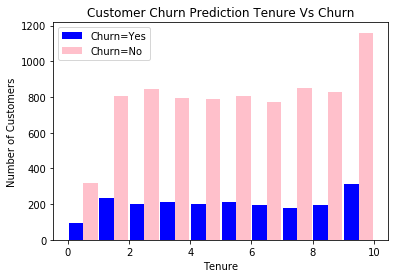

In [7]:
tenure_exited_no = df[df.Exited == 0].Tenure
tenure_exited_yes = df[df.Exited == 1].Tenure


plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Tenure Vs Churn")

plt.hist([tenure_exited_yes, tenure_exited_no], rwidth = 0.95, color=['blue','pink'], label=['Churn=Yes','Churn=No'])
plt.legend()

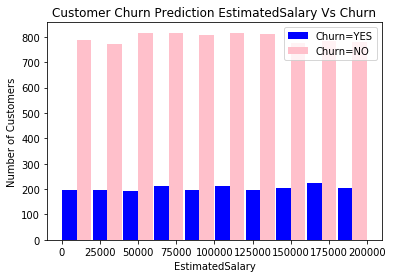

In [8]:
estimatedsalary_churn_no = df[df.Exited == 0].EstimatedSalary
estimatedsalary_churn_yes = df[df.Exited == 1].EstimatedSalary

plt.xlabel("EstimatedSalary")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction EstimatedSalary Vs Churn")

plt.hist([estimatedsalary_churn_yes, estimatedsalary_churn_no], rwidth=0.95, color=['blue','pink'], label=['Churn=YES','Churn=NO'])
plt.legend()

In [9]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column}: {df[column].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [10]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [11]:
df.Gender.unique()

array([1, 0], dtype=int64)

In [12]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [13]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1800,713,1,59,3,0.00,2,1,1,62700.08,0,1,0,0
4577,580,0,39,3,119688.81,1,1,0,137041.26,0,0,1,0
763,742,1,21,1,114292.48,1,1,0,31520.40,0,0,1,0
3485,604,0,33,3,0.00,1,1,0,42171.13,1,1,0,0
5360,633,0,35,10,0.00,2,1,0,65675.47,0,1,0,0


In [14]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

In [15]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [16]:
cols_to_scale = ['CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

C:\Users\khushi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [18]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 5)

In [19]:
X_train.shape

(8000, 12)

In [20]:
X_test.shape

(2000, 12)

In [21]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [22]:
len(X_train.columns)

12

# Build a model (ANN) in tensorflow/keras

In [23]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5222 - accuracy: 0.7958
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7986
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8059
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8110
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.8151
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8202
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8242
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8290
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3868 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8634
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8641
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8644
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8630
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8640
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8636
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8624
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8631
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8634
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 

In [24]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8535


[0.35590270161628723, 0.8535000085830688]

In [25]:
yp = model.predict(X_test)
yp[:5]

array([[0.02820373],
       [0.0439778 ],
       [0.073688  ],
       [0.08324191],
       [0.05182102]], dtype=float32)

In [26]:
y_predicted = []
for element in yp:
    if element > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [27]:
y_predicted[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [28]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.47      0.56       405

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

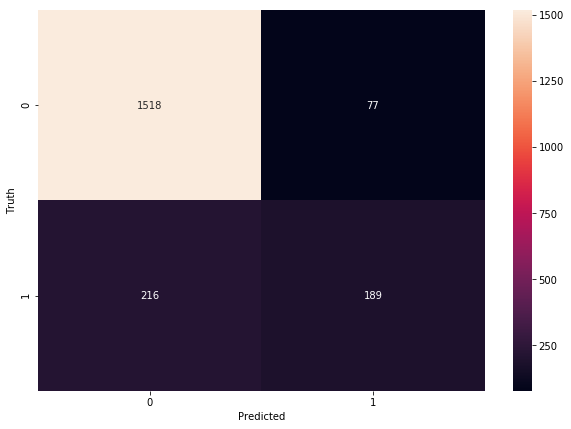

In [30]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [31]:
y_test.shape

(2000,)

In [32]:
#Accuracy
round(((1496+203)/2000), 2)

0.85

In [33]:
#Precision for 0 class i.e. Precision for customers who did not churn
round(1496/(1496+202),2)

0.88

In [34]:
#Precision for 1 class i.e. Precision for customers who actually churned
round(203/(99+203), 2)

0.67

In [35]:
#Recall for 0
round(1496/(1496+99), 2)

0.94

In [36]:
#Recall for 1
round(203/(202+203), 2)

0.5